In [66]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [68]:
#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler

#feature selection
from sklearn.feature_selection import mutual_info_classif

#classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

# performance metrics
from sklearn.metrics import balanced_accuracy_score,f1_score,precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score

In [55]:
# Kdm6 demethylases regulate pancreatic cancer plasticity and subtype specification
# Expression profiling by high throughput sequencing
#data handling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bioinfokit import analys,visuz
ji=r"C:\Users\pavan\OneDrive\Desktop\GSE202300_Normalized_counts_WT_vs_DKO.xlsx"
df=pd.read_excel(ji, header=[0], index_col=[0])
df.head()

,WT_1,WT_2,WT_3,WT_4,WT_5,DKO_1,DKO_2,DKO_3,DKO_4
Gene,,,,,,,,,
0610005C13Rik,3.388658,7.301144,7.832582,4.678004,7.072334,6.044479,7.318855,8.379696,5.561541
0610009B22Rik,308.367865,354.626999,444.107400,295.649831,268.748678,337.627336,333.007917,477.642659,339.254010
0610009E02Rik,4.518210,12.516247,4.699549,0.935601,4.041334,5.180982,4.879237,13.035082,5.561541
0610009L18Rik,16.943289,7.301144,15.665164,7.484806,14.144667,21.587426,32.934849,26.070165,23.358473
0610010F05Rik,1304.633276,1150.451705,1227.365602,1237.799768,1130.563049,1169.174969,928.274816,816.554798,968.820468


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14581 entries, 0610005C13Rik to ccdc198
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   WT_1    14581 non-null  float64
 1   WT_2    14581 non-null  float64
 2   WT_3    14581 non-null  float64
 3   WT_4    14581 non-null  float64
 4   WT_5    14581 non-null  float64
 5   DKO_1   14581 non-null  float64
 6   DKO_2   14581 non-null  float64
 7   DKO_3   14581 non-null  float64
 8   DKO_4   14581 non-null  float64
dtypes: float64(9)
memory usage: 1.1+ MB


In [4]:
df.describe()

,WT_1,WT_2,WT_3,WT_4,WT_5,DKO_1,DKO_2,DKO_3,DKO_4
count,14581.000000,14581.000000,14581.000000,14581.000000,14581.000000,14581.000000,14581.000000,14581.000000,14581.000000
mean,1340.938930,1342.682238,1303.659925,1373.645838,1353.723387,1421.929093,1388.850885,1453.497690,1360.467545
std,4152.479700,3936.597948,3766.174008,4009.105891,3916.358794,4672.240002,5105.446010,5155.465745,4704.686191
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.793447,43.806865,43.079201,36.488429,37.382335,41.447857,41.473513,51.209252,44.492329
50%,447.302837,444.326769,447.240433,435.989941,441.515686,459.380416,451.329411,450.641417,462.720224
75%,1309.151486,1321.507081,1269.661545,1314.519028,1319.495390,1337.556889,1322.273194,1282.093452,1308.074479
max,238912.804200,178660.039100,163048.510100,185807.498600,154157.677000,242045.123500,374679.039500,258244.533000,356194.464500


In [5]:
df.duplicated()

Gene
0610005C13Rik    False
0610009B22Rik    False
0610009E02Rik    False
0610009L18Rik    False
0610010F05Rik    False
                 ...  
Zyg11b           False
Zyx              False
Zzef1            False
Zzz3             False
ccdc198          False
Length: 14581, dtype: bool

In [6]:
df.isnull().sum()

WT_1     0
WT_2     0
WT_3     0
WT_4     0
WT_5     0
DKO_1    0
DKO_2    0
DKO_3    0
DKO_4    0
dtype: int64

In [7]:
df=df.replace(0,np.nan)
df.tail()

,WT_1,WT_2,WT_3,WT_4,WT_5,DKO_1,DKO_2,DKO_3,DKO_4
Gene,,,,,,,,,
Zyg11b,1172.475619,1165.053994,1026.851503,1067.520435,1611.481736,1437.722543,1369.845754,619.166409,1566.129988
Zyx,2571.991315,2954.877318,2764.901452,2965.854320,2191.413094,3932.365443,4003.413859,4796.910287,3925.335744
Zzef1,1078.722752,1258.925846,1450.594190,1138.626091,1160.873050,1048.285386,1189.313989,1215.055886,789.738843
Zzz3,1905.555270,2117.331788,2226.803068,2846.097427,2320.735767,2226.095325,2522.565466,1648.937911,2257.985707
ccdc198,32.757026,1.043021,NaN,NaN,NaN,0.863497,NaN,NaN,1.112308


In [8]:
#filling the nan values with mean to analyse it
df=df.fillna(df.mean())
df.tail()

,WT_1,WT_2,WT_3,WT_4,WT_5,DKO_1,DKO_2,DKO_3,DKO_4
Gene,,,,,,,,,
Zyg11b,1172.475619,1165.053994,1026.851503,1067.520435,1611.481736,1437.722543,1369.845754,619.166409,1566.129988
Zyx,2571.991315,2954.877318,2764.901452,2965.854320,2191.413094,3932.365443,4003.413859,4796.910287,3925.335744
Zzef1,1078.722752,1258.925846,1450.594190,1138.626091,1160.873050,1048.285386,1189.313989,1215.055886,789.738843
Zzz3,1905.555270,2117.331788,2226.803068,2846.097427,2320.735767,2226.095325,2522.565466,1648.937911,2257.985707
ccdc198,32.757026,1.043021,1345.174819,1431.470123,1418.923205,0.863497,1470.008330,1508.215899,1.112308


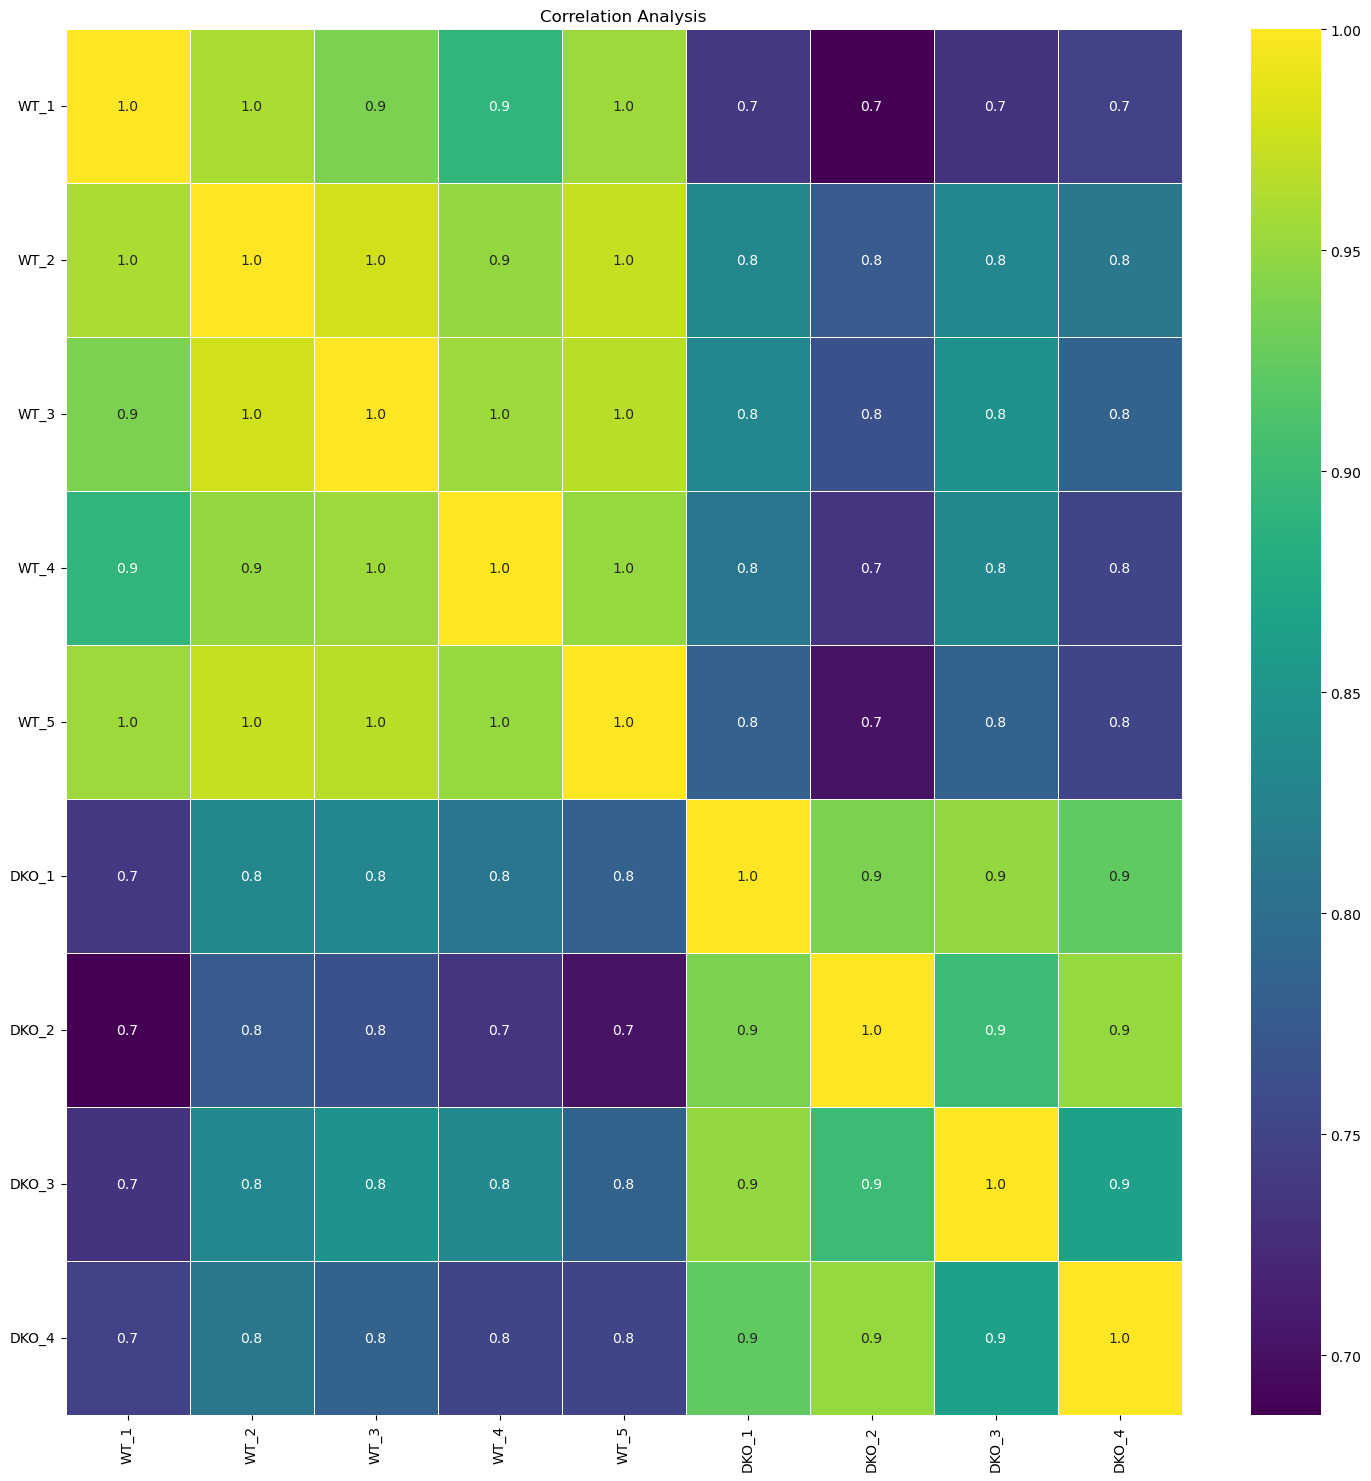

In [9]:
# data visualization
# Correlation finding
import seaborn as sns
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(df.corr(method='pearson'),annot= True,linewidths=0.6,fmt = ".1f",cmap='viridis',ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Analysis')
plt.show()

In [10]:
%pip install pydeseq2

In [11]:
df.describe()

,WT_1,WT_2,WT_3,WT_4,WT_5,DKO_1,DKO_2,DKO_3,DKO_4
count,14581.000000,14581.000000,14581.000000,14581.000000,14581.000000,14581.000000,14581.000000,14581.000000,14581.000000
mean,1416.007426,1395.811330,1345.174819,1431.470123,1418.923205,1486.993338,1470.008330,1508.215899,1422.413400
std,4140.340383,3927.526324,3758.981464,3999.186731,3905.073320,4662.328126,5094.394531,5147.745992,4695.720504
min,1.129553,1.043021,0.783258,0.935601,1.010333,0.863497,1.219809,0.931077,1.112308
25%,93.752867,77.183523,66.576947,68.298853,77.795670,84.622708,98.804547,85.659112,87.872350
50%,570.424073,537.155601,517.733671,527.678813,553.662691,566.454047,586.728235,529.782988,569.501814
75%,1416.007426,1395.811330,1345.174819,1431.470123,1418.923205,1486.993338,1470.008330,1508.215899,1422.413400
max,238912.804200,178660.039100,163048.510100,185807.498600,154157.677000,242045.123500,374679.039500,258244.533000,356194.464500


In [51]:
# We can even analyse it with the help of a box plot
boxplot=df.boxplot()

WT_1 WT_2 WT_3 WT_4 WT_5 DKO_1 DKO_2 DKO_3 DKO_4 

In [12]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

In [13]:
# we have to extract the metadata and then create obs:condition for the data given
#converting the data to type int as it is required
for i in df.columns:
    try:
        df[[i]] = df[[i]].astype(float).astype(int)
    except:
        pass

In [14]:
df.head()

,WT_1,WT_2,WT_3,WT_4,WT_5,DKO_1,DKO_2,DKO_3,DKO_4
Gene,,,,,,,,,
0610005C13Rik,3,7,7,4,7,6,7,8,5
0610009B22Rik,308,354,444,295,268,337,333,477,339
0610009E02Rik,4,12,4,0,4,5,4,13,5
0610009L18Rik,16,7,15,7,14,21,32,26,23
0610010F05Rik,1304,1150,1227,1237,1130,1169,928,816,968


In [15]:
df=df.T
df

Gene,0610005C13Rik,0610009B22Rik,0610009E02Rik,0610009L18Rik,0610010F05Rik,0610010K14Rik,0610012G03Rik,0610030E20Rik,0610038B21Rik,0610039H22Rik,...,Zwilch,Zwint,Zxda,Zxdb,Zxdc,Zyg11b,Zyx,Zzef1,Zzz3,ccdc198
WT_1,3,308,4,16,1304,497,509,772,6,1416,...,1202,2904,84,144,405,1172,2571,1078,1905,32
WT_2,7,354,12,7,1150,566,614,617,13,5,...,1137,2911,81,102,520,1165,2954,1258,2117,1
WT_3,7,444,4,15,1227,664,389,656,14,3,...,1011,4025,65,117,421,1026,2764,1450,2226,1345
WT_4,4,295,0,7,1237,650,572,592,8,1,...,1448,2638,82,120,442,1067,2965,1138,2846,1431
WT_5,7,268,4,14,1130,576,729,594,5,7,...,950,2536,80,111,397,1611,2191,1160,2320,1418
DKO_1,6,337,5,21,1169,647,672,570,18,1486,...,1057,3991,133,200,670,1437,3932,1048,2226,0
DKO_2,7,333,4,32,928,683,626,675,13,1470,...,1224,2470,118,167,1146,1369,4003,1189,2522,1470
DKO_3,8,477,13,26,816,671,736,412,12,1508,...,969,4255,99,162,703,619,4796,1215,1648,1508
DKO_4,5,339,5,23,968,671,645,508,14,3,...,961,4012,126,205,629,1566,3925,789,2257,1


In [16]:
metadata=pd.DataFrame(zip(df.index,['W','W','W','W','W','D','D','D','D']),columns=['sample','condition'])

In [17]:
metadata

,sample,condition
0,WT_1,W
1,WT_2,W
2,WT_3,W
3,WT_4,W
4,WT_5,W
5,DKO_1,D
6,DKO_2,D
7,DKO_3,D
8,DKO_4,D


In [18]:
metadata=metadata.set_index('sample')
metadata

,condition
sample,
WT_1,W
WT_2,W
WT_3,W
WT_4,W
WT_5,W
DKO_1,D
DKO_2,D
DKO_3,D
DKO_4,D


In [19]:
#use deseqdataset to initialise the ds
dds=DeseqDataSet(counts=df,metadata=metadata,design_factors="condition")

In [20]:
dds.var

""
Gene
0610005C13Rik
0610009B22Rik
0610009E02Rik
0610009L18Rik
0610010F05Rik
...
Zyg11b
Zyx
Zzef1


In [21]:
dds.deseq2()

Fitting size factors...
... done in 0.03 seconds.

Fitting dispersions...
... done in 4.62 seconds.

Fitting dispersion trend curve...
C:\Users\pavan\anaconda3\Lib\site-packages\pydeseq2\dds.py:590: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend()
... done in 0.37 seconds.

Fitting MAP dispersions...
... done in 6.22 seconds.

Fitting LFCs...
... done in 3.76 seconds.

Replacing 0 outlier genes.



In [22]:
dds

AnnData object with n_obs × n_vars = 9 × 14581
    obs: 'condition'
    uns: 'mean_disp', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', 'replaceable'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks'

In [23]:
# Now we can start the differential expression of genes
stat=DeseqStats(dds,contrast=('condition','W','D'))

In [24]:
stat.summary()

Running Wald tests...


Log2 fold change & Wald test p-value: condition W vs D
                  baseMean  log2FoldChange     lfcSE      stat    pvalue  \
Gene                                                                       
0610005C13Rik     5.986463       -0.209414  0.465795 -0.449584  0.653010   
0610009B22Rik   349.808124       -0.148560  0.211984 -0.700805  0.483425   
0610009E02Rik     5.653511       -0.486397  0.782430 -0.621650  0.534172   
0610009L18Rik    17.832232       -1.106460  0.342305 -3.232378  0.001228   
0610010F05Rik  1100.842938        0.323503  0.124604  2.596252  0.009425   
...                    ...             ...       ...       ...       ...   
Zyg11b         1222.810478       -0.041673  0.306562 -0.135936  0.891872   
Zyx            3335.840802       -0.625379  0.131670 -4.749604  0.000002   
Zzef1          1144.776417        0.204832  0.172335  1.188572  0.234608   
Zzz3           2224.727063        0.083170  0.180051  0.461923  0.644136   
ccdc198         798.991406       

... done in 1.70 seconds.



In [25]:
res=stat.results_df

In [26]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Gene,,,,,,
0610005C13Rik,5.986463,-0.209414,0.465795,-0.449584,0.653010,0.783394
0610009B22Rik,349.808124,-0.148560,0.211984,-0.700805,0.483425,0.651760
0610009E02Rik,5.653511,-0.486397,0.782430,-0.621650,0.534172,0.690183
0610009L18Rik,17.832232,-1.106460,0.342305,-3.232378,0.001228,0.006773
0610010F05Rik,1100.842938,0.323503,0.124604,2.596252,0.009425,0.035345
...,...,...,...,...,...,...
Zyg11b,1222.810478,-0.041673,0.306562,-0.135936,0.891872,0.935602
Zyx,3335.840802,-0.625379,0.131670,-4.749604,0.000002,0.000035
Zzef1,1144.776417,0.204832,0.172335,1.188572,0.234608,0.396690


In [27]:
# Now we can do filtering and then eliminate the lowly expressed genes from the dataset
# We can pick a range like everything that is less than 10 basemean should be removed
res=res[res.baseMean>=10]
#baseMean is a just the average of the normalized count values dividing by size factors taken over all samples

In [28]:
res
# All with basemean less than 10 are removed

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Gene,,,,,,
0610009B22Rik,349.808124,-0.148560,0.211984,-0.700805,0.483425,0.651760
0610009L18Rik,17.832232,-1.106460,0.342305,-3.232378,0.001228,0.006773
0610010F05Rik,1100.842938,0.323503,0.124604,2.596252,0.009425,0.035345
0610010K14Rik,623.583774,-0.172085,0.110753,-1.553763,0.120241,0.243539
0610012G03Rik,608.641852,-0.246622,0.196388,-1.255787,0.209193,0.365123
...,...,...,...,...,...,...
Zyg11b,1222.810478,-0.041673,0.306562,-0.135936,0.891872,0.935602
Zyx,3335.840802,-0.625379,0.131670,-4.749604,0.000002,0.000035
Zzef1,1144.776417,0.204832,0.172335,1.188572,0.234608,0.396690


In [29]:
res.info()
# We can observe that approximately 500 entries are removed

<class 'pandas.core.frame.DataFrame'>
Index: 14079 entries, 0610009B22Rik to ccdc198
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   baseMean        14079 non-null  float64
 1   log2FoldChange  14079 non-null  float64
 2   lfcSE           14079 non-null  float64
 3   stat            14079 non-null  float64
 4   pvalue          13119 non-null  float64
 5   padj            13119 non-null  float64
dtypes: float64(6)
memory usage: 769.9+ KB


In [30]:
# It can be further simplified by taking the p val to be 0.05 and filtered further
#log2foldchange:Significant mean positive log2 fold changes corresponds to increased expression 
#whereas negative values corresponds to decreased expression.
# we can separate them into up and down regulated
significant=res[(res.padj<0.05) & (abs(res.log2FoldChange>1.5))]

In [31]:
significant

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Gene,,,,,,
0610040J01Rik,102.202990,3.092454,1.255071,2.463968,1.374082e-02,4.752760e-02
1500009L16Rik,624.950252,7.087495,1.199489,5.908761,3.446896e-09,1.549511e-07
1700016C15Rik,39.182254,6.129242,0.863121,7.101257,1.236271e-12,1.285439e-10
1700020A23Rik,472.763240,8.567764,1.492334,5.741186,9.401583e-09,3.679855e-07
1700030C10Rik,612.052028,2.222584,0.704209,3.156144,1.598697e-03,8.404420e-03
...,...,...,...,...,...,...
Zfp185,12.304762,3.810070,0.907959,4.196300,2.713102e-05,3.006930e-04
Zfp57,1236.585690,1.634887,0.381484,4.285602,1.822451e-05,2.152958e-04
Zfp618,281.623760,3.951146,0.836837,4.721523,2.340857e-06,3.912247e-05


In [32]:
#Now for the down regulated genes
down=res[(res.padj<0.05) & (abs(res.log2FoldChange<-1.5))]

In [33]:
down

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Gene,,,,,,
1700012B09Rik,274.121141,-3.469932,1.021831,-3.395799,6.842864e-04,4.257956e-03
1700016G22Rik,654.259754,-8.032283,0.285919,-28.092825,1.198710e-173,5.442545e-170
1700018A04Rik,340.875104,-6.801611,1.182970,-5.749606,8.945179e-09,3.552253e-07
1700110K17Rik,501.800859,-6.212228,1.141400,-5.442637,5.249751e-08,1.617802e-06
1810008I18Rik,512.915514,-5.150782,0.951041,-5.415939,6.096778e-08,1.845427e-06
...,...,...,...,...,...,...
Zfp532,118.985936,-1.657750,0.498706,-3.324103,8.870331e-04,5.246321e-03
Zfp580,149.348785,-1.608834,0.486263,-3.308566,9.377501e-04,5.492396e-03
Zfp667,35.647526,-1.749746,0.534240,-3.275207,1.055845e-03,6.032579e-03


In [34]:
combined=res[ (res.padj<0.05) & (abs(res.log2FoldChange<-1.5) | abs(res.log2FoldChange>1.5)) ]

combined

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Gene,,,,,,
0610040J01Rik,102.202990,3.092454,1.255071,2.463968,1.374082e-02,4.752760e-02
1500009L16Rik,624.950252,7.087495,1.199489,5.908761,3.446896e-09,1.549511e-07
1700012B09Rik,274.121141,-3.469932,1.021831,-3.395799,6.842864e-04,4.257956e-03
1700016C15Rik,39.182254,6.129242,0.863121,7.101257,1.236271e-12,1.285439e-10
1700016G22Rik,654.259754,-8.032283,0.285919,-28.092825,1.198710e-173,5.442545e-170
...,...,...,...,...,...,...
Zfp667,35.647526,-1.749746,0.534240,-3.275207,1.055845e-03,6.032579e-03
Zfp804a,780.770995,7.702573,0.285411,26.987644,2.063934e-160,7.028212e-157
Zfp977,314.246079,7.142514,1.838249,3.885500,1.021195e-04,9.083542e-04


In [35]:
req1=pd.Series(-np.log10(combined['pvalue']))

In [36]:
req2=pd.Series(combined['log2FoldChange'])

In [37]:
new_df=pd.DataFrame({'log2FoldChange':req2,'pvalue':req1})
new_df.reset_index(inplace=True)
# Remove the last row as it contains not null values and is an error
new_df

,Gene,log2FoldChange,pvalue
0,0610040J01Rik,3.092454,1.861987
1,1500009L16Rik,7.087495,8.462572
2,1700012B09Rik,-3.469932,3.164762
3,1700016C15Rik,6.129242,11.907886
4,1700016G22Rik,-8.032283,172.921286
...,...,...,...
1241,Zfp667,-1.749746,2.976400
1242,Zfp804a,7.702573,159.685304
1243,Zfp977,7.142514,3.990891
1244,Zmat1,-1.751729,8.893773


In [38]:
rslt1_df =new_df[new_df['log2FoldChange'] >0]
rslt1_df

,Gene,log2FoldChange,pvalue
0,0610040J01Rik,3.092454,1.861987
1,1500009L16Rik,7.087495,8.462572
3,1700016C15Rik,6.129242,11.907886
6,1700020A23Rik,8.567764,8.026799
7,1700030C10Rik,2.222584,2.796234
...,...,...,...
1232,Zfp185,3.810070,4.566534
1238,Zfp57,1.634887,4.739344
1240,Zfp618,3.951146,5.630625
1242,Zfp804a,7.702573,159.685304


In [39]:
rslt2_df =new_df[new_df['log2FoldChange'] <0]
rslt2_df

,Gene,log2FoldChange,pvalue
2,1700012B09Rik,-3.469932,3.164762
4,1700016G22Rik,-8.032283,172.921286
5,1700018A04Rik,-6.801611,8.048411
10,1700110K17Rik,-6.212228,7.279861
11,1810008I18Rik,-5.150782,7.214900
...,...,...,...
1237,Zfp532,-1.657750,3.052060
1239,Zfp580,-1.608834,3.027913
1241,Zfp667,-1.749746,2.976400
1244,Zmat1,-1.751729,8.893773


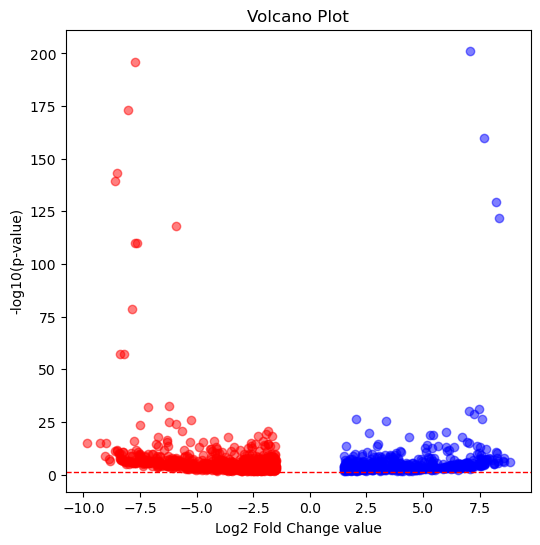

In [43]:
# Significant threshold level
alpha=0.05
plt.figure(figsize=(6, 6))
plt.scatter(rslt1_df['log2FoldChange'], rslt1_df['pvalue'], color='blue', alpha=0.5,)
plt.scatter(rslt2_df['log2FoldChange'], rslt2_df['pvalue'], color='red', alpha=0.5,)
# to get the level
plt.axhline(-np.log10(alpha), color='red', linestyle='--', linewidth=1)
plt.xlabel('Log2 Fold Change value')
plt.ylabel('-log10(p-value)')
plt.title('Volcano Plot')
#plt.grid(True)
plt.show()

In [60]:
dds.layers['log1p'] = np.log1p(dds.layers['normed_counts'])

In [61]:
dds_sigs = dds[:, significant.index]
dds_sigs

View of AnnData object with n_obs × n_vars = 9 × 488
    obs: 'condition'
    uns: 'mean_disp', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', 'replaceable'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'log1p'

In [62]:
grapher = pd.DataFrame(dds_sigs.layers['log1p'].T,
                       index=dds_sigs.var_names, columns=dds_sigs.obs_names)

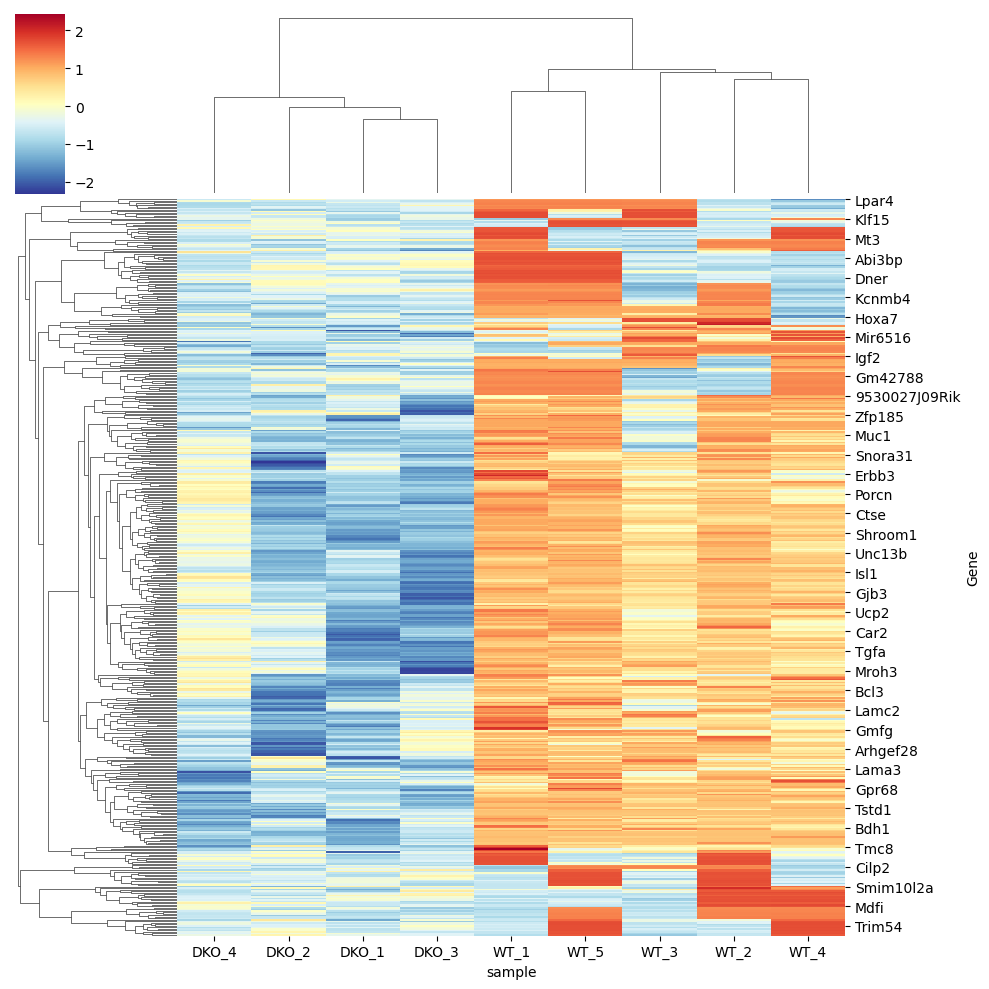

In [64]:
sns.clustermap(grapher, z_score=0, cmap = 'RdYlBu_r')

In [ ]:
# we can save the file if we want

In [72]:
combined.to_csv(r"C:\Users\pavan\OneDrive\Desktop\combined.csv")